In [1]:
#IMPORTING ALL THE NEEDED LIBRAIRES
import nltk 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [2]:
#Old Dataset
News = pd.read_csv("C:\\Users\\Admin\\Desktop\\Changes_final_news.csv")

In [3]:
#information of Dataset
News.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Unnamed: 0.1                   19999 non-null  int64 
 1   Unnamed: 0                     19999 non-null  int64 
 2   link                           19999 non-null  object
 3   headline                       19999 non-null  object
 4   category                       19999 non-null  object
 5   short_description              19999 non-null  object
 6   authors                        18904 non-null  object
 7   date                           19999 non-null  object
 8   text length short_description  19999 non-null  int64 
 9   text length headline           19999 non-null  int64 
 10  year                           19999 non-null  int64 
 11  month                          19999 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 1.8+ MB


In [4]:
# count the number of values for category column
News['category'].value_counts()

POLITICS          6932
ENTERTAINMENT     3373
WORLD NEWS        1917
U.S. NEWS         1377
COMEDY             782
QUEER VOICES       608
SPORTS             590
BLACK VOICES       531
MEDIA              512
WOMEN              407
WEIRD NEWS         383
CRIME              377
BUSINESS           188
STYLE & BEAUTY     165
IMPACT             140
HOME & LIVING      125
LATINO VOICES      121
ENVIRONMENT        121
WELLNESS           118
PARENTING          114
FOOD & DRINK       114
RELIGION           110
PARENTS            105
TRAVEL             103
STYLE               99
TECH                95
GREEN               90
HEALTHY LIVING      86
SCIENCE             76
EDUCATION           58
MONEY               49
CULTURE & ARTS      44
TASTE               44
ARTS & CULTURE      40
COLLEGE              3
WEDDINGS             2
Name: category, dtype: int64

In [5]:
# Top 5 rows
News.head()

,Unnamed: 0.1,Unnamed: 0,link,headline,category,short_description,authors,date,text length short_description,text length headline,year,month
0,0,0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23,29,11,2022,9
1,1,1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23,28,13,2022,9
2,2,2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23,12,13,2022,9
3,3,3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23,25,9,2022,9
4,4,4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22,25,11,2022,9


In [6]:
# Replace the the name THE WORLDPOST to WORLDPOST
News['category'] = News['category'].replace('THE WORLDPOST', 'WORLDPOST')

In [7]:
#Checked the number of null values for all the columns
News.isna().sum()

Unnamed: 0.1                        0
Unnamed: 0                          0
link                                0
headline                            0
category                            0
short_description                   0
authors                          1095
date                                0
text length short_description       0
text length headline                0
year                                0
month                               0
dtype: int64

In [8]:
# Split the date column in to two different columns 'Year', 'Month'
News['year'] = pd.to_datetime(News['date']).dt.year
News['month'] = pd.to_datetime(News['date']).dt.month

News.head()

News.to_csv('Changes_final_news.csv')

## EDA of Fake News Detection

In [9]:
#Imported Required Libraries  
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
#Dataset
capstone = pd.read_csv("C:\\Users\\Admin\\Desktop\\Changes_final_news.csv")
capstone

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,link,headline,category,short_description,authors,date,text length short_description,text length headline,year,month
0,0,0,0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23,29,11,2022,9
1,1,1,1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23,28,13,2022,9
2,2,2,2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23,12,13,2022,9
3,3,3,3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23,25,9,2022,9
4,4,4,4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22,25,11,2022,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,19994,19994,19994,https://www.huffingtonpost.com/entry/santa-cla...,Santa Claus Gets The Boot From Britain's Natio...,WEIRD NEWS,Don't say the 'S' word!,Ed Mazza,2017-11-20,5,13,2017,11
19995,19995,19995,19995,https://www.huffingtonpost.com/entry/mugabe-cl...,Zimbabwe's Mugabe Clings To Power As His Resig...,WORLD NEWS,He and his wife Grace would be granted full im...,"Joe Brock and MacDonald Dzirutwe, Reuters",2017-11-20,14,10,2017,11
19996,19996,19996,19996,https://www.huffingtonpost.com/entry/transitio...,Transition In The Middle East: Transition To W...,WORLD NEWS,Transition is the name of the game in the Midd...,"James M. Dorsey, ContributorS. Rajaratnam Scho...",2017-11-20,22,8,2017,11
19997,19997,19997,19997,https://www.huffingtonpost.com/entry/germany-c...,What You Need To Know About 'Germany's Brexit ...,WORLD NEWS,The breakdown of coalition talks has plunged G...,"Marco Fieber, HuffPost Germany",2017-11-20,14,9,2017,11


In [11]:
#Top 5 rows
capstone.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,link,headline,category,short_description,authors,date,text length short_description,text length headline,year,month
0,0,0,0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23,29,11,2022,9
1,1,1,1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23,28,13,2022,9
2,2,2,2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23,12,13,2022,9
3,3,3,3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23,25,9,2022,9
4,4,4,4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22,25,11,2022,9


In [12]:
#Bottom 5 rows 
capstone.tail()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,link,headline,category,short_description,authors,date,text length short_description,text length headline,year,month
19994,19994,19994,19994,https://www.huffingtonpost.com/entry/santa-cla...,Santa Claus Gets The Boot From Britain's Natio...,WEIRD NEWS,Don't say the 'S' word!,Ed Mazza,2017-11-20,5,13,2017,11
19995,19995,19995,19995,https://www.huffingtonpost.com/entry/mugabe-cl...,Zimbabwe's Mugabe Clings To Power As His Resig...,WORLD NEWS,He and his wife Grace would be granted full im...,"Joe Brock and MacDonald Dzirutwe, Reuters",2017-11-20,14,10,2017,11
19996,19996,19996,19996,https://www.huffingtonpost.com/entry/transitio...,Transition In The Middle East: Transition To W...,WORLD NEWS,Transition is the name of the game in the Midd...,"James M. Dorsey, ContributorS. Rajaratnam Scho...",2017-11-20,22,8,2017,11
19997,19997,19997,19997,https://www.huffingtonpost.com/entry/germany-c...,What You Need To Know About 'Germany's Brexit ...,WORLD NEWS,The breakdown of coalition talks has plunged G...,"Marco Fieber, HuffPost Germany",2017-11-20,14,9,2017,11
19998,19998,19998,19998,https://www.huffingtonpost.com/entry/new-york-...,New York City’s Subways Need Congestion Pricin...,POLITICS,"In a major, thorough and truly important piece...","Steven Cohen, ContributorProfessor in the Prac...",2017-11-20,19,8,2017,11


In [13]:
#Rows and columns of the Dataset
capstone.shape

(19999, 13)

In [14]:
#Information of the Dataset
capstone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Unnamed: 0.2                   19999 non-null  int64 
 1   Unnamed: 0.1                   19999 non-null  int64 
 2   Unnamed: 0                     19999 non-null  int64 
 3   link                           19999 non-null  object
 4   headline                       19999 non-null  object
 5   category                       19999 non-null  object
 6   short_description              19999 non-null  object
 7   authors                        18904 non-null  object
 8   date                           19999 non-null  object
 9   text length short_description  19999 non-null  int64 
 10  text length headline           19999 non-null  int64 
 11  year                           19999 non-null  int64 
 12  month                          19999 non-null  int64 
dtypes

In [15]:
#Size of the Dataset
capstone.size

259987

In [16]:
#Checking the null values in the Dataset
capstone.isnull().sum()

Unnamed: 0.2                        0
Unnamed: 0.1                        0
Unnamed: 0                          0
link                                0
headline                            0
category                            0
short_description                   0
authors                          1095
date                                0
text length short_description       0
text length headline                0
year                                0
month                               0
dtype: int64

* We can see that there is only one column i.e "authors" that contains null values.

In [17]:
capstone.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0.2,19999.0,9999.000000,5773.358353,0.0,4999.5,9999.0,14998.5,19998.0
Unnamed: 0.1,19999.0,9999.000000,5773.358353,0.0,4999.5,9999.0,14998.5,19998.0
Unnamed: 0,19999.0,9999.000000,5773.358353,0.0,4999.5,9999.0,14998.5,19998.0
text length short_description,19999.0,15.733737,6.112413,1.0,11.0,16.0,20.0,44.0
text length headline,19999.0,11.025351,2.223376,2.0,10.0,11.0,12.0,23.0
year,19999.0,2018.758088,1.456638,2017.0,2018.0,2018.0,2020.0,2022.0
month,19999.0,5.708035,3.837041,1.0,2.0,5.0,9.0,12.0


In [18]:
#Removed unnecessary columns which is not needed
capstone_new= capstone.pop('Unnamed: 0')

In [19]:
#Rows and columns before removing NaN or missing values
capstone.shape

(19999, 12)

In [20]:
#Exploring the unique values of whole dataframe using for loop
for col in capstone.columns:
    # get the unique values in the column
    unique_values = pd.unique(capstone[col])
    
    # print the unique values
    capstone_unique = print(f"\n Unique values in {col}: {unique_values}")


 Unique values in Unnamed: 0.2: [    0     1     2 ... 19996 19997 19998]

 Unique values in Unnamed: 0.1: [    0     1     2 ... 19996 19997 19998]

 Unique values in link: ['https://www.huffpost.com/entry/covid-boosters-uptake-us_n_632d719ee4b087fae6feaac9'
 'https://www.huffpost.com/entry/american-airlines-passenger-banned-flight-attendant-punch-justice-department_n_632e25d3e4b0e247890329fe'
 'https://www.huffpost.com/entry/funniest-tweets-cats-dogs-september-17-23_n_632de332e4b0695c1d81dc02'
 ...
 'https://www.huffingtonpost.com/entry/transition-in-the-middle-east-transition-to-what_us_5a125a8de4b023121e0e9465'
 'https://www.huffingtonpost.com/entry/germany-coalition-talks-collapse_us_5a1309eae4b0aa32975cac4a'
 'https://www.huffingtonpost.com/entry/new-york-citys-subways-need-congestion-pricing-now_us_5a12d58ee4b0e6450602eccf']

 Unique values in headline: ['Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters'
 'American Airlines Flyer Charged, Banned For 

In [21]:
#Rows and columns after removing NaN or missing values
capstone.dropna(inplace = True)
capstone.shape

(18904, 12)

In [22]:
capstone.isnull().sum()

Unnamed: 0.2                     0
Unnamed: 0.1                     0
link                             0
headline                         0
category                         0
short_description                0
authors                          0
date                             0
text length short_description    0
text length headline             0
year                             0
month                            0
dtype: int64

* Now we can see that there is no null values or NaN values in the "authors" column

In [23]:
#It shows how much memory is used by each column uses in bytes
capstone.memory_usage()

Index                            151232
Unnamed: 0.2                     151232
Unnamed: 0.1                     151232
link                             151232
headline                         151232
category                         151232
short_description                151232
authors                          151232
date                             151232
text length short_description    151232
text length headline             151232
year                             151232
month                            151232
dtype: int64

In [24]:
# Datatype Report of the Dataset
capstone_data_types_report = pd.DataFrame(capstone.dtypes, columns=['Data Type'])

# Count the number of categorical and numerical columns
capstone_categorical = capstone.select_dtypes(include='object').columns.size
capstone_numerical = capstone.select_dtypes(exclude='object').columns.size

# Display the number of categorical and numerical columns
print(f"Number of Categorical Columns: {capstone_categorical}")
print(f"Number of Numerical Columns: {capstone_numerical}")

# Display the data types report
print("\ncapstone_data_types_report:")
print(capstone_data_types_report)

Number of Categorical Columns: 6
Number of Numerical Columns: 6

capstone_data_types_report:
                              Data Type
Unnamed: 0.2                      int64
Unnamed: 0.1                      int64
link                             object
headline                         object
category                         object
short_description                object
authors                          object
date                             object
text length short_description     int64
text length headline              int64
year                              int64
month                             int64


## Bivariate Analysis using Heat Map

In [25]:
capstone_corr = capstone.corr(method = 'kendall')
capstone_corr

,Unnamed: 0.2,Unnamed: 0.1,text length short_description,text length headline,year,month
Unnamed: 0.2,1.000000,1.000000,-0.235022,-0.022138,-0.835300,-0.191900
Unnamed: 0.1,1.000000,1.000000,-0.235022,-0.022138,-0.835300,-0.191900
text length short_description,-0.235022,-0.235022,1.000000,0.014031,0.260534,0.086051
text length headline,-0.022138,-0.022138,0.014031,1.000000,0.023507,-0.012927
year,-0.835300,-0.835300,0.260534,0.023507,1.000000,-0.082352
month,-0.191900,-0.191900,0.086051,-0.012927,-0.082352,1.000000


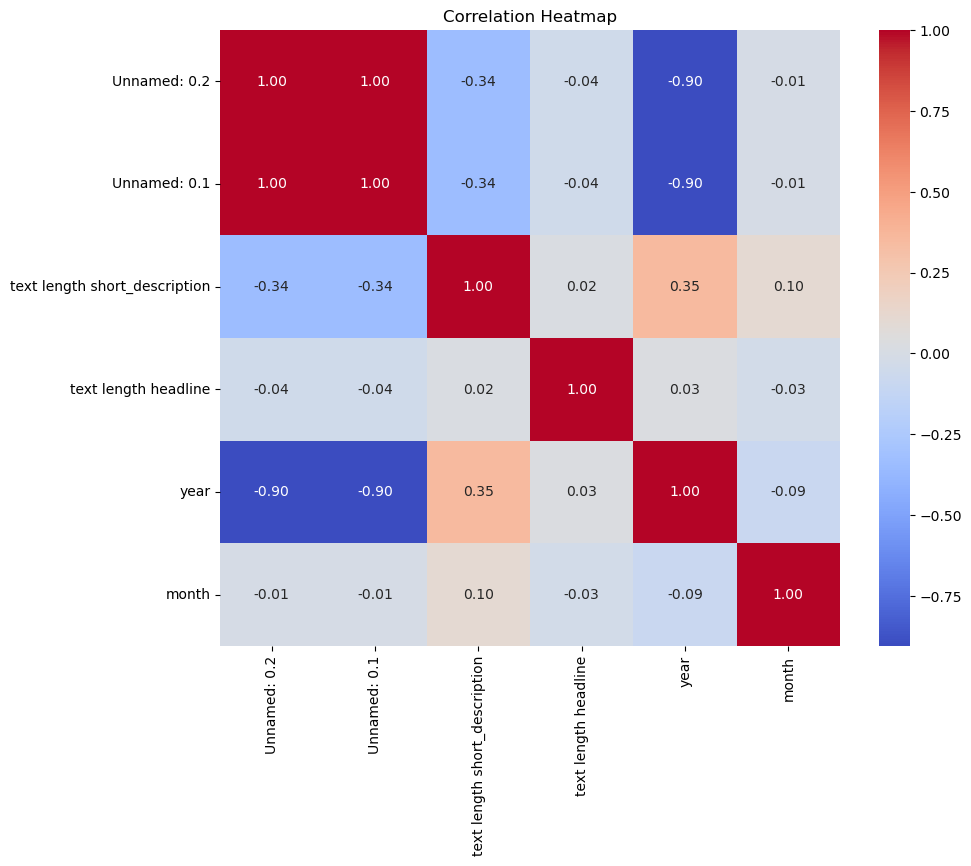

In [26]:
# Select numeric columns for correlation analysis
numeric_cols = capstone.select_dtypes(include='number')

# Calculate correlation matrix
correlation_matrix = numeric_cols.corr()

# Create heatmap with annotated correlation coefficients
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

* Relationship shows in the heat map
* 1: Perfect positive correlation
* 0: No correlation
* -1: Perfect negative correlation

## Checked for the Outliers 

In [27]:
capstone_numerical = capstone.select_dtypes(exclude='object')
capstone_numerical

,Unnamed: 0.2,Unnamed: 0.1,text length short_description,text length headline,year,month
0,0,0,29,11,2022,9
1,1,1,28,13,2022,9
2,2,2,12,13,2022,9
3,3,3,25,9,2022,9
4,4,4,25,11,2022,9
...,...,...,...,...,...,...
19994,19994,19994,5,13,2017,11
19995,19995,19995,14,10,2017,11
19996,19996,19996,22,8,2017,11
19997,19997,19997,14,9,2017,11


In [28]:
# Assuming capstone_categorical is a DataFrame or Series containing numerical data
quartiles = capstone_numerical.quantile([0.25, 0.75])
IQR = quartiles.loc[0.75] - quartiles.loc[0.25]

IQR_sorted = IQR.sort_index()

Q1 = quartiles.loc[0.25]
Q3 = quartiles.loc[0.75]

lower_limit = Q1 - 1.5 * IQR_sorted
upper_limit = Q3 + 1.5 * IQR_sorted

# The IQR for each column is now stored in the 'IQR' Series
print(f'IQR values for columns:\n{IQR_sorted} \n')
print(f'lower_limit for columns:\n{lower_limit}\n')
print(f'upper_limit for columns:\n{upper_limit}')

IQR values for columns:
Unnamed: 0.1                     10039.5
Unnamed: 0.2                     10039.5
month                                7.0
text length headline                 3.0
text length short_description        9.0
year                                 2.0
dtype: float64 

lower_limit for columns:
Unnamed: 0.1                    -9956.5
Unnamed: 0.2                    -9956.5
month                              -8.5
text length headline                5.5
text length short_description      -2.5
year                             2015.0
dtype: float64

upper_limit for columns:
Unnamed: 0.1                     30201.5
Unnamed: 0.2                     30201.5
month                               19.5
text length headline                17.5
text length short_description       33.5
year                              2023.0
dtype: float64


In [29]:
Number_of_outliers = ((capstone_numerical < lower_limit) | (capstone_numerical > upper_limit)).sum()

# Print the number of outliers for each column
print("Number of outliers for each column:")
print(Number_of_outliers)

Number of outliers for each column:
Unnamed: 0.1                       0
Unnamed: 0.2                       0
month                              0
text length headline             237
text length short_description     25
year                               0
dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_2840\3533599584.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  Number_of_outliers = ((capstone_numerical < lower_limit) | (capstone_numerical > upper_limit)).sum()


## We Identified the outliers specifically in the 'text length headline' and 'text length short_description' columns within the entire numericals columns of the dataset.

## Bar plot of Month vs Top 10 Categories

C:\Users\Admin\AppData\Local\Temp\ipykernel_2840\2761391561.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['category'] = pd.Categorical(filtered_df['category'], categories=top_categories, ordered=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_2840\2761391561.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.sort_values('category', inplace=True)


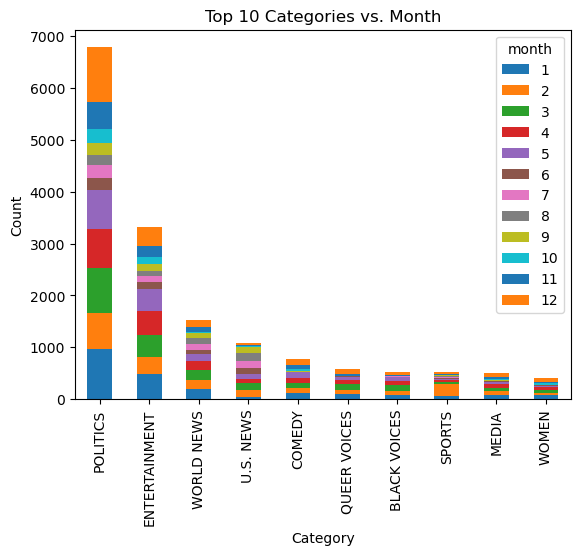

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the top 10 categories
top_categories = capstone['category'].value_counts().nlargest(10).index

# Filter the DataFrame for only the top 10 categories
filtered_df = capstone[capstone['category'].isin(top_categories)]

# Sort the categories in descending order
filtered_df['category'] = pd.Categorical(filtered_df['category'], categories=top_categories, ordered=True)
filtered_df.sort_values('category', inplace=True)

# Create a crosstab and plot the bar chart
crosstab = pd.crosstab(filtered_df['category'], filtered_df['month'])
crosstab.plot(kind='bar', stacked=True)
plt.title('Top 10 Categories vs. Month')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

## Bar plot of Years vs Top 10 Categories

C:\Users\Admin\AppData\Local\Temp\ipykernel_2840\1862349166.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['category'] = pd.Categorical(filtered_df['category'], categories=top_categories, ordered=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_2840\1862349166.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.sort_values('category', inplace=True)


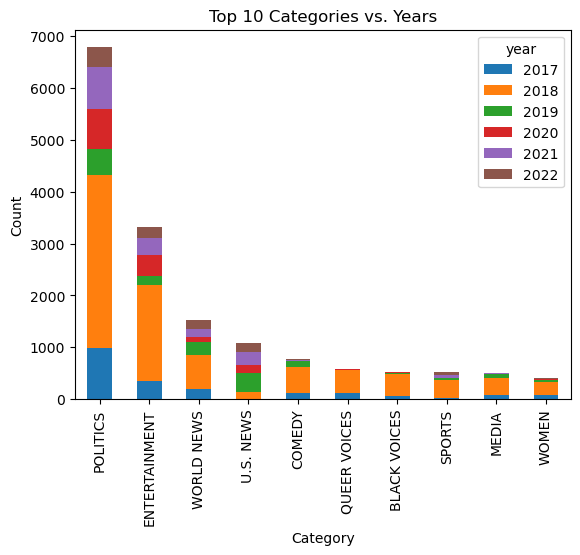

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the top 10 categories
top_categories = capstone['category'].value_counts().nlargest(10).index

# Filter the DataFrame for only the top 10 categories
filtered_df = capstone[capstone['category'].isin(top_categories)]

# Sort the categories in descending order
filtered_df['category'] = pd.Categorical(filtered_df['category'], categories=top_categories, ordered=True)
filtered_df.sort_values('category', inplace=True)

# Create a crosstab and plot the bar chart
crosstab = pd.crosstab(filtered_df['category'], filtered_df['year'])
crosstab.plot(kind='bar', stacked=True)
plt.title('Top 10 Categories vs. Years')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

* We can see that highest number of news articles was published in 2018 and the mode leading category of the news is Politics.

## Bar plot of Year wise Highest Text length headline

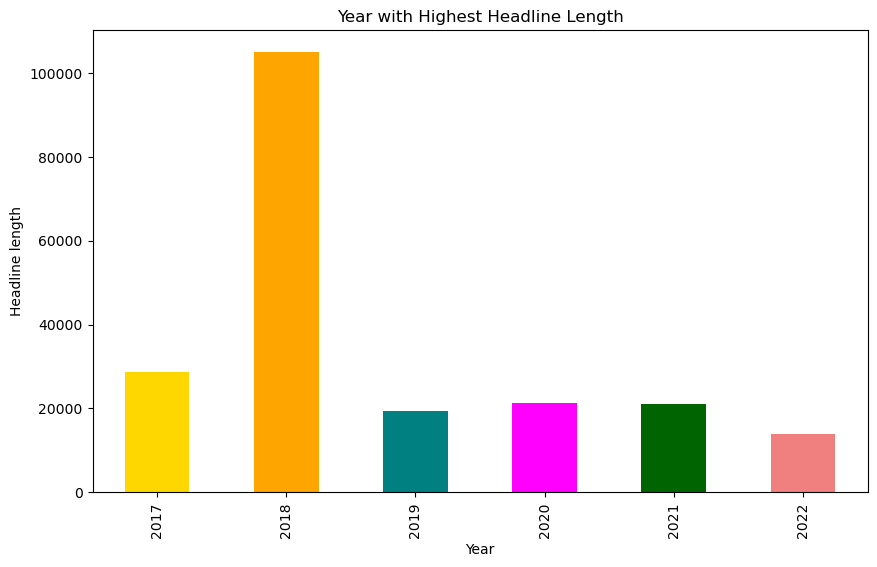

The year with the Highest Headline Length: 2018
Headline Length in the year of 2018: 105003


In [32]:
# Find the year with the highest total text length in short description
max_year = capstone.groupby('year')['text length headline'].sum().idxmax()

# Create a bar chart and highlight the bar for the year with the highest text length
plt.figure(figsize=(10, 6))
capstone.groupby('year')['text length headline'].sum().plot(kind='bar', color=['gold','orange', 'teal', 'magenta', 'darkgreen', 'lightcoral'])
plt.bar(max_year, capstone.groupby('year')['text length headline'].sum().loc[max_year])

plt.xlabel('Year')
plt.ylabel('Headline length')
plt.title('Year with Highest Headline Length')
plt.show()

# Find and print the year with the highest text length
highest_text_length_year = capstone.groupby('year')['text length headline'].sum().idxmax()
highest_text_length_value = capstone.groupby('year')['text length headline'].sum().max()

print(f"The year with the Highest Headline Length: {highest_text_length_year}")
print(f"Headline Length in the year of {highest_text_length_year}: {highest_text_length_value}")

* Thus we can observe from the both above bar charts that highest news articles was published in the year of 2018 so the highest Headline length value is also in the year of 2018.

## Year wise contribution of Top 20 Authors 

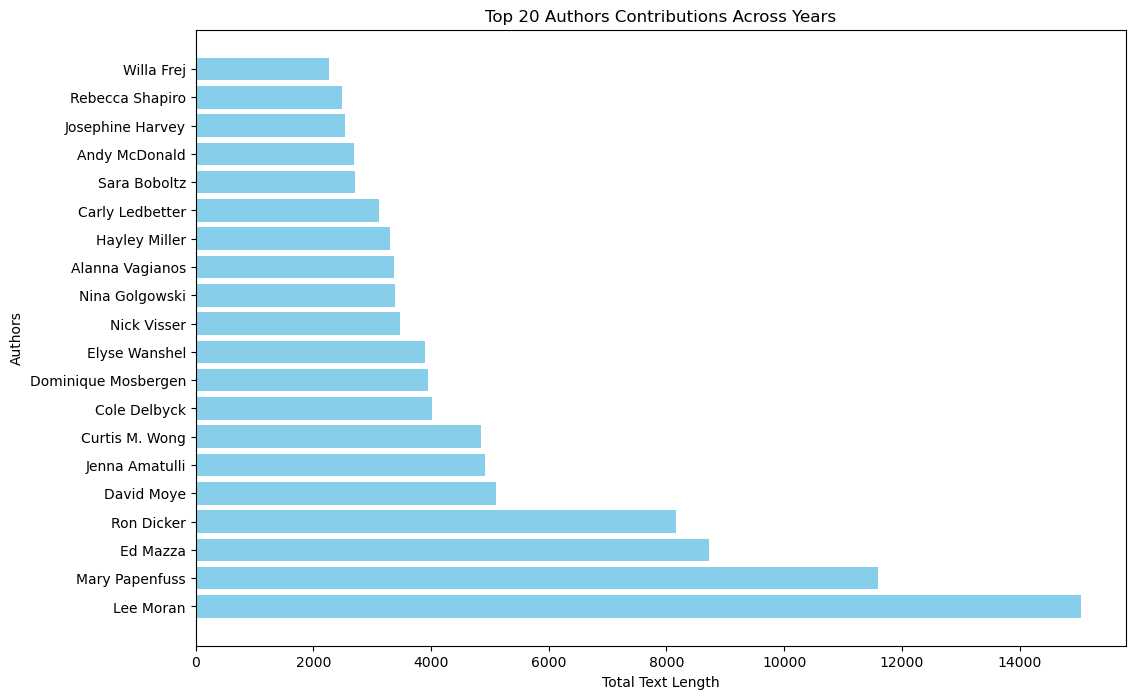

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the DataFrame for the specified years
years_to_plot = [2017, 2018, 2019, 2020, 2021, 2022]
filtered_capstone = capstone[capstone['year'].isin(years_to_plot)]

# Group by author and sum the contributions
author_contributions = filtered_capstone.groupby('authors')['text length headline'].sum().reset_index()

# Sort the DataFrame by total contributions in descending order
author_contributions.sort_values(by='text length headline', ascending=False, inplace=True)

# Select the top 20 authors
top_20_authors = author_contributions.head(20)

# Create a horizontal bar chart for the top 20 authors
plt.figure(figsize=(12, 8))
plt.barh(top_20_authors['authors'], top_20_authors['text length headline'], color='skyblue')
plt.xlabel('Total Text Length')
plt.ylabel('Authors')
plt.title('Top 20 Authors Contributions Across Years')
plt.show()

## Which Year has the highest number of Authors

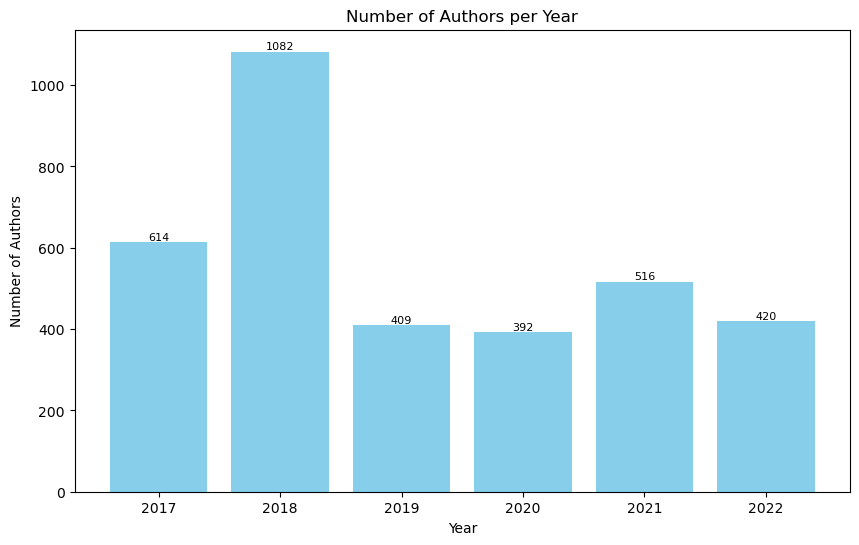

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by year and count unique authors
authors_per_year = capstone.groupby('year')['authors'].nunique().reset_index()

# Create a bar chart with count annotations
plt.figure(figsize=(10, 6))
bars = plt.bar(authors_per_year['year'], authors_per_year['authors'], color='skyblue')

# Add count annotations above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=8)

plt.xlabel('Year')
plt.ylabel('Number of Authors')
plt.title('Number of Authors per Year')
plt.show()
